# **HAPPY CUSTOMERS**

**INTRODUCTION:**

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. From operational standpoint we have been facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.


**GOALS**

Predict if a customer is happy or not based on the answers they give to questions asked, using:

(1) LOGISTIC REGRESSION
(2) DECISION TREESS
(3) KNN


**SUCCESS METRICS**:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.


**BONUS(ES)**:

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# Montar Google Drive
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
# Ruta correcta al archivo CSV en Google Drive
path_dbset = '/content/gdrive/MyDrive/Proyectos APZIVA/Proyecto 1/ACME-HappinessSurvey2020.csv'

# Leer el archivo CSV usando pd.read_csv()
db = pd.read_csv(path_dbset)

In [75]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


**Data Description**:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.


In [76]:
db.isnull().sum()

,0
Y,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0


In [77]:
db.head(6)


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5


In [78]:
db.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# **Quick Univariate Analysis**

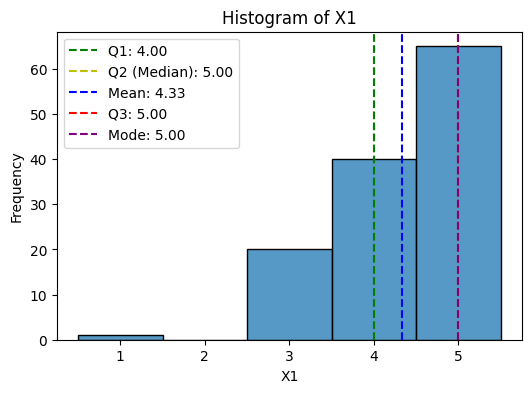

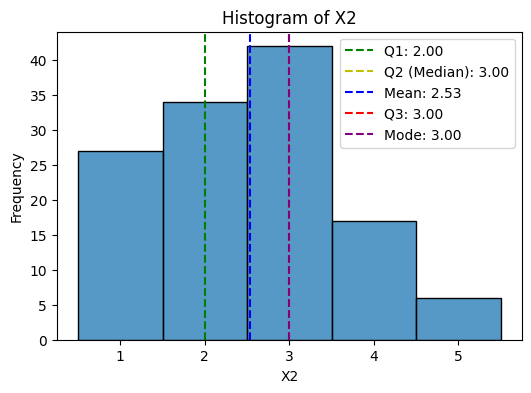

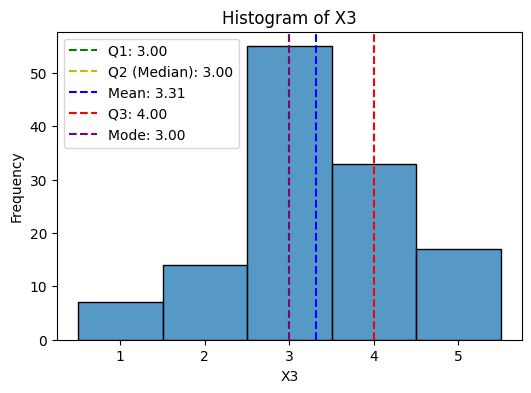

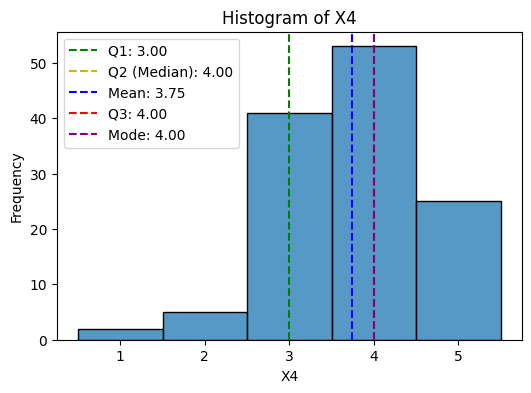

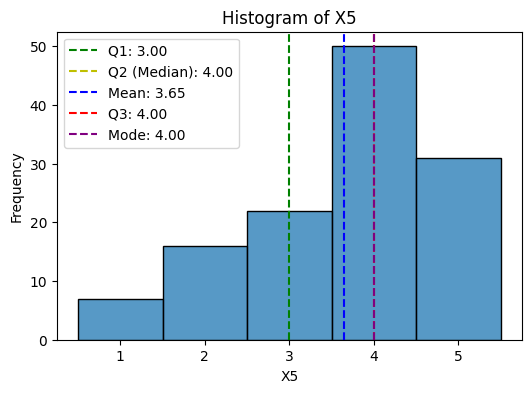

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns of interest.
columnas = ["X1", "X2", "X3", "X4", "X5"]

# Iterate over the columns to create the histograms.
for columna in columnas:
    # Calculate quartiles, mean and mode.
    Q1 = db[columna].quantile(0.25)
    Q2 = db[columna].quantile(0.50)
    media = db[columna].mean()
    Q3 = db[columna].quantile(0.75)
    moda = db[columna].mode()[0]

    # Create a figure for each histogram
    plt.figure(figsize=(6, 4))

    # Graph settings
    sns.histplot(db[columna], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], kde=False)
    plt.title(f'Histogram of {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frequency')

    # Add lines for Q1, Q2, media, Q3 y moda
    plt.axvline(Q1, color='g', linestyle='--', label=f'Q1: {Q1:.2f}')
    plt.axvline(Q2, color='y', linestyle='--', label=f'Q2 (Median): {Q2:.2f}')
    plt.axvline(media, color='b', linestyle='--', label=f'Mean: {media:.2f}')
    plt.axvline(Q3, color='r', linestyle='--', label=f'Q3: {Q3:.2f}')
    plt.axvline(moda, color='purple', linestyle='--', label=f'Mode: {moda:.2f}')

    # Show leyend
    plt.legend()

    # Show graph
    plt.show()

# **Quick Bivariate Analysis**

<Axes: >

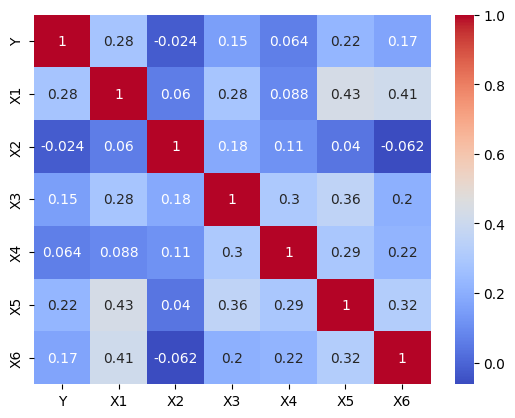

In [80]:
# Generate heat map
sns.heatmap(db.corr(), cmap='coolwarm', annot=True)

(1) The variables X2, X3, X4, and X6 have low correlation coefficients with respect to Y.

(2) The variables X1 and X5 have low to moderate correlation coefficients with respect to Y.

# **1 - LOGISTIC REGRESSION**

## **1.1 - Logistic Regression considering all predictors**

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #we import the LogisticRegression class from scikit-learn.

In [82]:
# Split data in training and test groups
X = db[['X1', 'X2', 'X3', 'X4', 'X5']]
y = db['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 30% for test

# Instantiate and train the logistic regression model.
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Obtain the coefficients and the intercept
coeficients = logistic_regression.coef_
intercept = logistic_regression.intercept_
# Show the results
print("Coeficients:", coeficients)
print("Intercept:", intercept)

Coeficients: [[ 0.94249254 -0.1866265  -0.04086802  0.02062548  0.02703188]]
Intercept: [-3.35266736]


*The probability of Y is mainly affected by X1, and the contribution of the other variables is insignificant compared to X1.*

**Sigmoid function for X1 and the rest of the variables held constant**

In [83]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


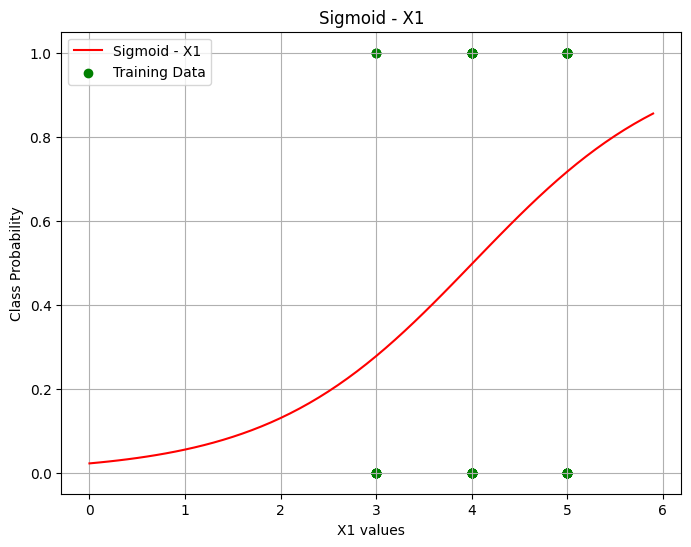

In [84]:
# Plot the sigmoid function for X1, keeping X2, X3, X4, and X5 constant.
X1_range = np.arange(0, 6, 0.1)  # Values for X1

# Define the input values while keeping X2, X3, X4, and X5 constant (using their means).
X2_media, X3_media, X4_media, X5_media = np.mean(db['X2']), np.mean(db['X3']), np.mean(db['X4']), np.mean(db['X5'])

#Plot the sigmoid function for X1 (while X2, X3, X4, and X5 are constant)
#Prediction for X1 (probability that class Y is 1 for the values of X1 in X1_news)
X1_news = np.column_stack([X1_range, np.full_like(X1_range, X2_media), np.full_like(X1_range, X3_media),
                           np.full_like(X1_range, X4_media), np.full_like(X1_range, X5_media)])
prediccion_X1 = logistic_regression.predict_proba(X1_news)[:, 1]
#The idea is that the sigmoid curve is plotted using all the values of X1 in the defined range, keeping the other variables
#(X2, X3, X4, and X5) constant at their means, while using the logistic regression model trained on the training set
#to predict the probability that Y is 1.

# Plot sigmoid for X1
plt.figure(figsize=(8, 6))
plt.plot(X1_range, prediccion_X1, label='Sigmoid - X1', color='red')

# Original data for reference.
plt.scatter(X_train['X1'], y_train, color='green', label='Training Data')  # Cambia X_train por X_test si quieres graficar los de prueba

plt.xlabel('X1 values')
plt.ylabel('Class Probability')
plt.legend()
plt.title('Sigmoid - X1')
plt.grid(True)
plt.show()


*As shown in the histogram for X1, both Q3 and the mode are at X1 = 4. This explains why, in this figure, the decision threshold (the X value corresponding to a probability of 0.5) is near 4.*

**MODEL VALIDATION (metrics)**

In [85]:
print(y_train.value_counts()) #to see if y is desbalanced

Y
1    51
0    37
Name: count, dtype: int64


In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions in the testing group
y_pred_logistic = logistic_regression.predict(X_test)

# Calculate precision, recall y F1-score
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)

# Show results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}") #y is not considerabily desbalanced but we also calculate F1-Score

Precision: 0.5
Recall: 0.6111111111111112
F1-Score: 0.55


## **1.2 - Logistic Regression considering only predictors X1 and X5**

In [87]:
# Split data in training and test groups
Xselect = db[['X1', 'X5']] #X1 and X5 have the highest Pearson correlation coefficients with the target variable Y.
y = db['Y']
Xselect_train, Xselect_test, y_train, y_test = train_test_split(Xselect, y, test_size=0.3, random_state=42)  # 30% for test

# Instantiate and train the logistic regression model.
logistic_regression = LogisticRegression()
logistic_regression.fit(Xselect_train, y_train)

# Obtain the coefficients and the intercept
coeficients = logistic_regression.coef_
intercept = logistic_regression.intercept_
# Show the results
print("Coeficients:", coeficients)
print("Intercept:", intercept)

Coeficients: [[0.92024204 0.01562121]]
Intercept: [-3.76591094]


*The probability of Y is mainly affected by X1, and the contribution of X5 is insignificant compared to X1.*

**MODEL VALIDATION (metrics)**

In [88]:
# Make predictions in the testing group
y_pred_logistic_sel = logistic_regression.predict(Xselect_test)

# Calculate precision, recall y F1-score
precision = precision_score(y_test, y_pred_logistic_sel)
recall = recall_score(y_test, y_pred_logistic_sel)
f1 = f1_score(y_test, y_pred_logistic_sel)

# Show results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}") #y is not considerabily desbalanced but we also calculate F1-Score

Precision: 0.6111111111111112
Recall: 0.6111111111111112
F1-Score: 0.6111111111111112


## **1.3. - Logistic Regression considering the filtered database an a bigger group of traning (90%)**

In [89]:
# Split data in training and test groups

Xselect_train_90, Xselect_test_10, y_train_90, y_test_10 = train_test_split(Xselect, y, test_size=0.1, random_state=42)  # 10% for test

# Instantiate and train the logistic regression model.
logistic_regression_90_10 = LogisticRegression()
logistic_regression_90_10.fit(Xselect_train_90, y_train_90)

# Obtain the coefficients and the intercept
coeficients = logistic_regression_90_10.coef_
intercept = logistic_regression_90_10.intercept_
# Show the results
print("Coeficients:", coeficients)
print("Intercept:", intercept)

Coeficients: [[0.64977137 0.22596041]]
Intercept: [-3.41961351]


**MODEL VALIDATION (metrics)**

In [ ]:
# Make predictions in the testing group
y_pred_logistic_sel_90_10 = logistic_regression_90_10.predict(Xselect_test_10)

# Calculate precision, recall y F1-score
precision = precision_score(y_test_10, y_pred_logistic_sel_90_10)
recall = recall_score(y_test_10, y_pred_logistic_sel_90_10)
f1 = f1_score(y_test_10, y_pred_logistic_sel_90_10)

# Show results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}") #y is not considerabily desbalanced but we also calculate F1-Score

Precision: 0.4444444444444444
Recall: 0.6666666666666666
F1-Score: 0.5333333333333333


**RESULTS**

For X1, which exhibits the highest correlation with Y (a Pearson coefficient of 0.28 and a weight coefficient of w1 = 0.94), the sigmoid function shows a relatively steep slope. This indicates a strong relationship, with X1 having a significant influence on the predicted probability of Y. When we only use predictors with highest Pearson correlation with y (Xselected = X1 and X5) The coefficients w1 and w5 exhibit only slight variations, indicating that their contribution to the logistic regression model remains stable across different runs or datasets.

The performance metrics indicate a moderate predictive capacity of the model. Even when considering metrics that account for the slight imbalance in the target variable y (such as the F1-Score), no significant improvement is observed. This suggests that the model's fair performance is likely due to the low linear correlation between the predictors (X) and the target variable (y).

When evaluating the model with the "filtered" dataset (Xselected={X1, X5}), Precision and F1-Score show a slight improvement, while Recall remains unchanged. However, the overall metrics continue to be moderate and fall below the desired threshold of 73%. When the training group was increased to 90% using the filtered dataset, the model's performance declined.

Feature X1 is the most influential predictor of customer happiness, as indicated by its higher coefficient value in the logistic regression model. When using only X1 and X5, the model shows a slight improvement in predictive accuracy for Y compared to using all variables. However, the overall performance remains under 73%.

# **2 - DECISION TREES for Classification**

## **2.1. Classification through CART algoritm using all predictors**

In [112]:
from sklearn.tree import DecisionTreeClassifier

#we create a tree object (instantiation)

DecisionTreeClassifier = DecisionTreeClassifier(max_depth=3, random_state=42)
# We used max_depth=3 because without specifing this hiperparameter we get more
# than 7 levels (or depths) ---> OVERFITTING (Leaf nodes or pure divisions)

**To train the model use the training and testing sets generated in logistic regression**:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  30% para prueba

In [113]:
#Training the Decision Tree model
DecisionTreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

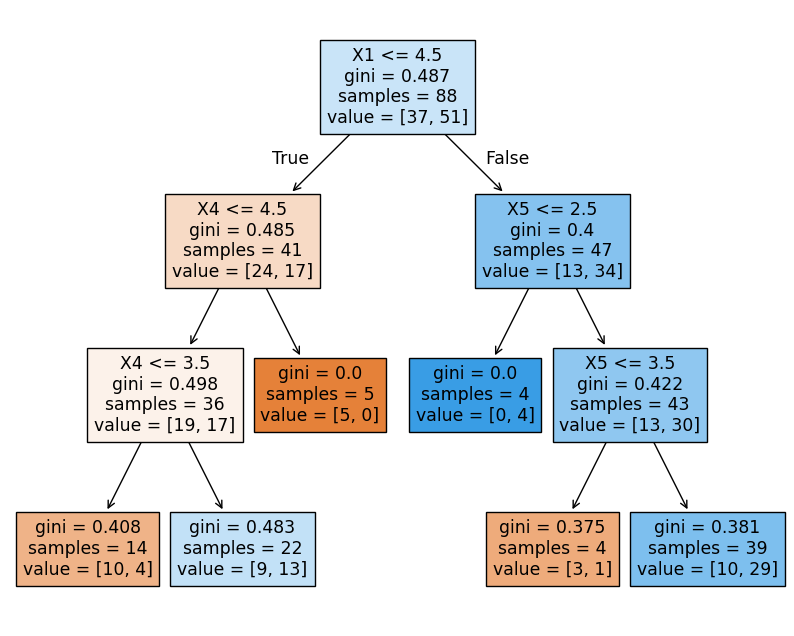

In [114]:
from sklearn import tree
import matplotlib.pyplot as plt

# Training the model
DecisionTreeClassifier.fit(X_train, y_train)

# Tree visualization with original names.
plt.figure(figsize=(10, 8))
tree.plot_tree(
    DecisionTreeClassifier,
    feature_names=X.columns,  # Original names of the columns
    filled=True
)
plt.show()

**MODEL VALIDATION (metrics)**

In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set.
y_pred_tree = DecisionTreeClassifier.predict(X_test)

# Calculate precision, recall y F1-score
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Show results
print(f"Precision: {precision_tree}")
print(f"Recall: {recall_tree}")
print(f"F1-Score: {f1_tree}") #y is not considerabily desbalanced but we also calculate F1-Score

Precision: 0.5652173913043478
Recall: 0.7222222222222222
F1-Score: 0.6341463414634146


## **2.2. Classification through CART algoritm using only X1 and X5 predictors**

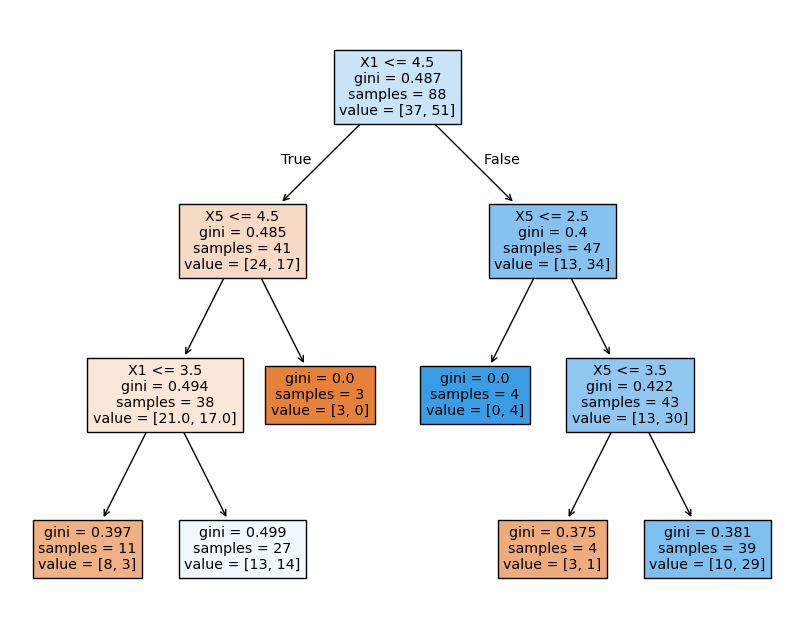

In [116]:
# Training the model
DecisionTreeClassifier.fit(Xselect_train, y_train) #Xselect_train is the training group that contains X1 and X5

# Tree visualization with original names.
plt.figure(figsize=(10, 8))
tree.plot_tree(
    DecisionTreeClassifier,
    feature_names=Xselect.columns,  # Original names of the columns
    filled=True
)
plt.show()

**MODEL VALIDATION (metrics)**

In [118]:
# Make predictions on the test set.
y_pred_tree_sel = DecisionTreeClassifier.predict(Xselect_test)

# Calculate precision, recall y F1-score
precision_tree = precision_score(y_test, y_pred_tree_sel)
recall_tree = recall_score(y_test, y_pred_tree_sel)
f1_tree = f1_score(y_test, y_pred_tree_sel)

# Show results
print(f"Precision: {precision_tree}")
print(f"Recall: {recall_tree}")
print(f"F1-Score: {f1_tree}") #y is not considerabily desbalanced but we also calculate F1-Score

Precision: 0.52
Recall: 0.7222222222222222
F1-Score: 0.6046511627906976


## **2.3. - Clasification through CART considering the filtered database an a bigger group of traning (90%)**

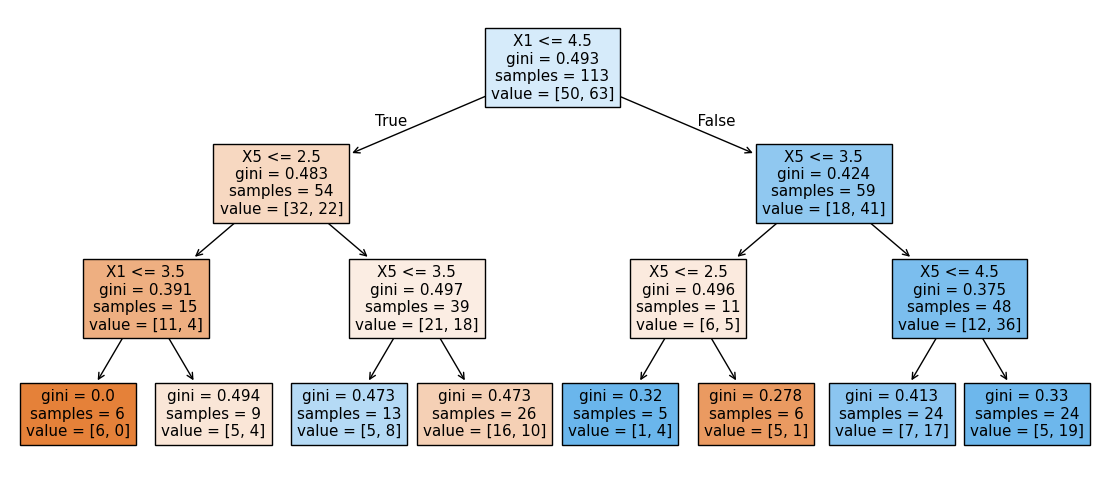

In [ ]:
#Training the Decision Tree model
DecisionTreeClassifier.fit(Xselect_train_90, y_train_90)

# Tree visualization with original names.
plt.figure(figsize=(14, 6))
tree.plot_tree(
    DecisionTreeClassifier,
    feature_names=Xselect.columns,  # Original names of the columns
    filled=True
)
plt.show()

**MODEL VALIDATION (metrics)**

In [137]:
# Make predictions on the test set.
y_pred_tree_sel_90_10 = DecisionTreeClassifier.predict(Xselect_test_10)

# Calculate precision, recall y F1-score
precision_tree_90 = precision_score(y_test_10, y_pred_tree_sel_90_10)
recall_tree_90 = recall_score(y_test_10, y_pred_tree_sel_90_10)
f1_tree_90 = f1_score(y_test_10, y_pred_tree_sel_90_10)

# Show results
print(f"Precision: {precision_tree}")
print(f"Recall: {recall_tree}")
print(f"F1-Score: {f1_tree}") #y is not considerabily desbalanced but we also calculate F1-Score

Precision: 0.52
Recall: 0.7222222222222222
F1-Score: 0.6046511627906976


**RESULTS**

The tree depth at which the model is neither underfitting nor overfitting and achieves the best performance metrics is max_depth = 3. The best metric reached is 0.722222 (Recall), but it still does not meet the threshold of 0.73 required in the exercise.

When evaluating the model with the "filtered" dataset (Xselected={X1, X5}), Precision and F1-Score show a slight decrease, while Recall remains unchanged. Increasing the training group size to 90% (using Xselected) does not improve the model’s performance.


# **3 - K NEAREST NEIGHBORS (KNN) for Classification**

## **3.1. Classification (KNN) using all predictors**

*In this project, it is not necessary to perform preprocessing, such as data cleaning or scaling. The minimum value of all predictors (X1 to X5) is 1, the maximum is 5, and 𝑦 y (TAG) takes values of 0 and 1, so it is not neccesary to scale independent variables*

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define empty lists for the desired accuracy values
list_accuracy_train = []
list_accuracy_test = []

# Define the list of k values to explore
k_neighbors = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]

# Instantiating the KNN object and generating a loop over the different k values

for k in k_neighbors:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Training the model
    knn.fit(X_train,y_train.values.ravel())

    # Predict and evaluate on the training set
    y_train_pred_knn = knn.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred_knn)

    # Predict and evaluate on the evaluation set
    y_test_pred_knn = knn.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred_knn)

    # Add the information to the lists
    list_accuracy_train.append(train_acc)
    list_accuracy_test.append(test_acc)


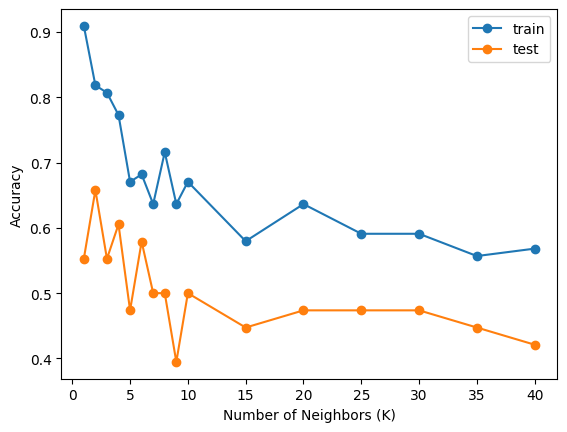

In [129]:
import matplotlib.pyplot as plt
#X_train accuracy and X_test accuracy plots
plt.plot(k_neighbors, list_accuracy_train, 'o-', label='train')
plt.plot(k_neighbors, list_accuracy_test, 'o-', label='test')
plt.xlabel('Number of Neighbors (K)')  # Axis X name
plt.ylabel('Accuracy')  # Axis y name
plt.legend()
plt.show()

*Sweet spot corresponds to K=7, when train and test group´s curves approach each other.*

In [130]:
# KNN object
knn7=KNeighborsClassifier(n_neighbors=7)

knn7.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=7)

**MODEL VALIDATION (Metrics)**

In [131]:
# Make predictions on the test group
y_pred_knn7 = knn7.predict(X_test)

# Calculate precision, recall y F1-score
precision_knn = precision_score(y_test, y_pred_knn7)
recall_knn = recall_score(y_test, y_pred_knn7)
f1_knn = f1_score(y_test, y_pred_knn7)

# Show results
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-Score: {f1_knn}") #y is not considerabily desbalanced but we also calculate F1-Score

Precision: 0.4827586206896552
Recall: 0.7777777777777778
F1-Score: 0.5957446808510638


## **3.2. Classification (KNN) using only X1, X5 predictors**

In [132]:
# Define empty lists for the desired accuracy values
list_accuracy_train_sel = []
list_accuracy_test_sel = []

# Define the list of k values to explore
k_neighbors = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]

# Instantiating the KNN object and generating a loop over the different k values

for k in k_neighbors:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Training the model
    knn.fit(Xselect_train,y_train.values.ravel())

    # Predict and evaluate on the training set
    y_train_pred_knn_sel = knn.predict(Xselect_train)
    train_acc_sel = accuracy_score(y_train, y_train_pred_knn_sel)

    # Predict and evaluate on the evaluation set
    y_test_pred_knn_sel = knn.predict(Xselect_test)
    test_acc_sel = accuracy_score(y_test, y_test_pred_knn_sel)

    # Add the information to the lists
    list_accuracy_train_sel.append(train_acc_sel)
    list_accuracy_test_sel.append(test_acc_sel)

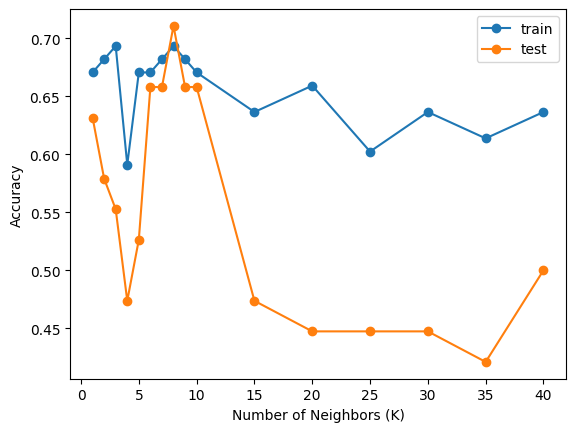

In [133]:
#X_train_sel accuracy and X_test_sel accuracy plots
plt.plot(k_neighbors, list_accuracy_train_sel, 'o-', label='train')
plt.plot(k_neighbors, list_accuracy_test_sel, 'o-', label='test')
plt.xlabel('Number of Neighbors (K)')  # Axis X name
plt.ylabel('Accuracy')  # Axis y name
plt.legend()
plt.show()

*Sweet spot corresponds to K=11,12 when train and test group´s curves approach each other.*

In [134]:
# KNN object
knn12_sel = KNeighborsClassifier(n_neighbors=12)

knn12_sel.fit(Xselect_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=12)

**MODEL VALIDATION (Metrics)**

In [135]:
# Make predictions on the test group
y_pred_knn12_sel = knn12_sel.predict(Xselect_test)

# Calculate precision, recall y F1-score
precision_knn = precision_score(y_test, y_pred_knn12_sel)
recall_knn = recall_score(y_test, y_pred_knn12_sel)
f1_knn = f1_score(y_test, y_pred_knn12_sel)

# Show results
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-Score: {f1_knn}") #y is not considerabily desbalanced but we also calculate F1-Score

Precision: 0.6190476190476191
Recall: 0.7222222222222222
F1-Score: 0.6666666666666666


## **3.3. Classification (KNN) using the filtered database (X1 and X5) and a bigger group of training**

In [136]:
# Training the model with Xselect training and y train groups up to 90%

knn12_sel.fit(Xselect_train_90, y_train_90.values.ravel())

KNeighborsClassifier(n_neighbors=12)

**MODEL VALIDATION (Metrics)**

In [138]:
# Make predictions on the test group
y_pred_knn12_sel_90_10 = knn12_sel.predict(Xselect_test_10)

# Calculate precision, recall y F1-score
precision_knn = precision_score(y_test_10, y_pred_knn12_sel_90_10)
recall_knn = recall_score(y_test_10, y_pred_knn12_sel_90_10)
f1_knn = f1_score(y_test_10, y_pred_knn12_sel_90_10)

# Show results
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-Score: {f1_knn}") #y is not considerabily desbalanced but we also calculate F1-Score

Precision: 0.8
Recall: 0.6666666666666666
F1-Score: 0.7272727272727273


**RESULTS**

Accuracy vs. K was plotted to find the sweet spot, which corresponds to K = 7 where the training and testing curves approach each other. When the performance metrics were calculated, it was observed that **RECALL exceeded the 73%
 threshold required in the project (it reaches 77%)**.

When database is filtered by better predictors (X1 and X5) sweet spot changes to K=11 and K=12. When the performance metrics were calculated, it was observed that **RECALL is 72% (for both, k=11 and k=12), less than the threshold required in the project**. As conclusion it has been seen that taking a filtered database doesn´t enhace the prediction capacity of the model.

Accuracy vs. K was plotted to find the sweet spot, corresponding to K=7, where the training and testing curves converge. Upon calculating the performance metrics, it was observed that RECALL exceeded the 73% threshold required for the project, reaching 77%.

When the database was filtered to include only the best predictors (X1 and X5), the sweet spot shifted to K=11 and K=12. However, the performance metrics revealed that RECALL dropped to 72% for both K=11 and K=12, which is below the project's required threshold.

**In conclusion, filtering the database did not improve the model's predictive performance but if we increase the size of the training group, F1-Score increase to 0.73.**

# **GOALS**

The predictive performance of Logistic Regression, Decision Trees, and KNN clasification models ranged from moderate to good. Among them, only the KNN classification model exceeded the required threshold of 73%, achieving a Recall score of 77%. Training the KNN model using only features X1 and X2, combined with a larger training dataset (90%), resulted in an improved F1-Score (73%) compared to KNN models trained on 70% of the data. The Decision Trees classification model performed closely, with a Recall score of 72.22%, while Logistic Regression demonstrated the lowest predictive capacity, with all performance metrics below 66%.



# **BONUS ANSWER**

We can apply a feature selection approach to predict customer happiness. A filtered dataset with a minimal set of attributes (consisting of X1 and X5) retains most of the relevant information about the problem. However, this minimal feature set improved the target predictability only in the logistic regression model, while the performance metrics remained constant in other methods.